In [ ]:
!pip3 install xgboost


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [78]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

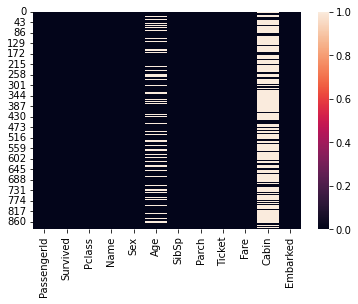

In [81]:
sns.heatmap(df.isnull())

 SINCE WE HAVE SOME NULL VALUES, REPLACING IT WITH SUITABLE VALUES
 

<AxesSubplot:xlabel='Age', ylabel='Density'>

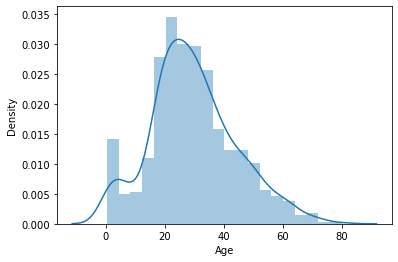

In [82]:
sns.distplot(df['Age'])

SIMILAR TO NORMAL DISTRIBUTION,HENCE REPLACING NULL VALUES WITH MEAN

In [83]:
np.mean(df['Age'])

29.69911764705882

In [84]:
np.median(df['Age'])

nan

In [85]:
np.max(df['Age'])

80.0

In [86]:
np.unique(df['Age'])

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

In [87]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [88]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [89]:
df['Age'].isnull().sum()

0

In [90]:
np.median(df['Age'])

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Density'>

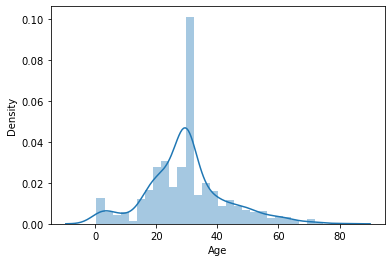

In [91]:
sns.distplot(df['Age'])

AGE IS NOW NORMALLY DISTRIBUTED

In [92]:
df['Embarked'].isnull().sum()

2

In [93]:
# FILLING NULL VALUES IN EMBARKED COLUMN WITH MODE
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [94]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [95]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [96]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

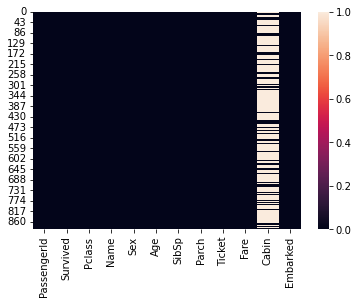

In [97]:
sns.heatmap(df.isnull())

All null values are filled or replaced or removed

# CORRELATIION

In [98]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


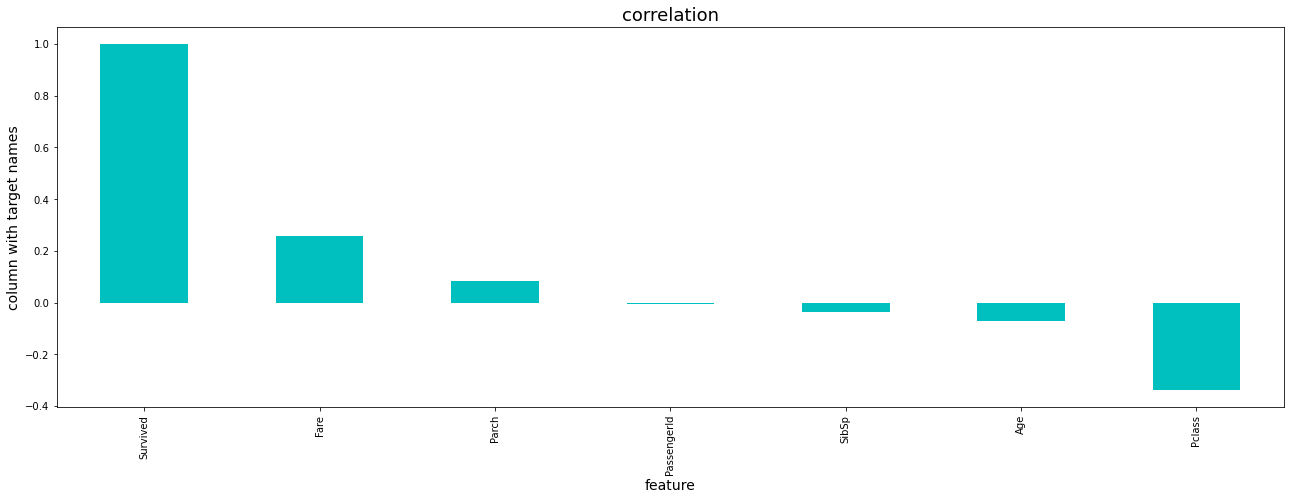

In [99]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

It is observed that all columns have Positive corelation except 'SibSp,'Age'and'Pclass' column.

<AxesSubplot:>

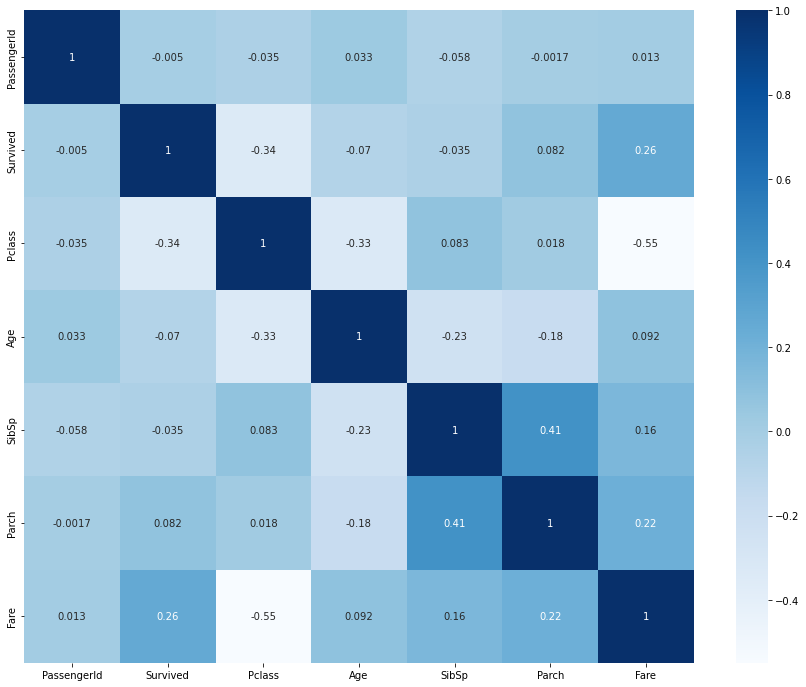

In [100]:
plt.figure(figsize=(15,12))

sns.heatmap(df.corr(),annot=True,linecolor='Black',cmap='Blues')

HIGHER THE FARE HIGH CHANCE OF SURVIVAL

In [101]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

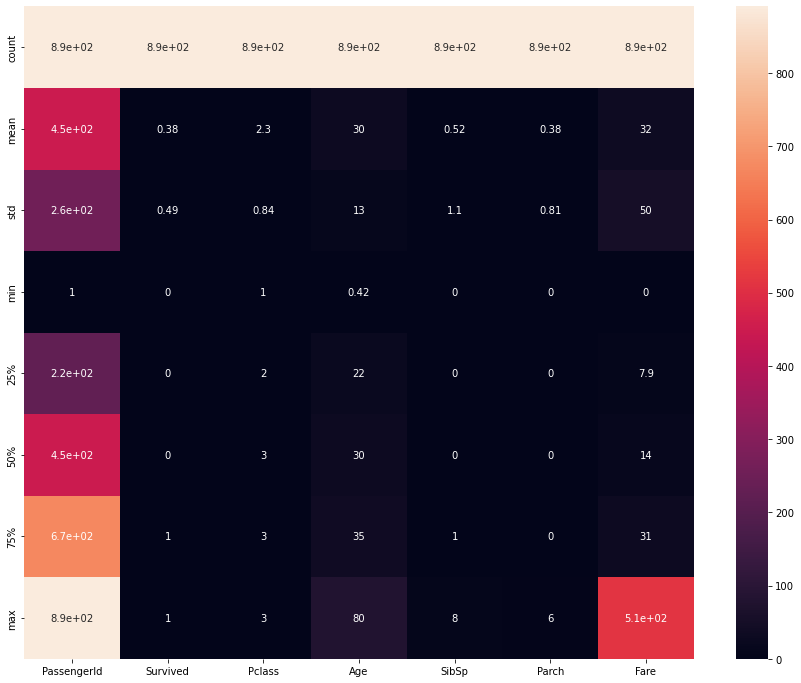

In [102]:
plt.figure(figsize=(15,12))

sns.heatmap(df.describe(),annot=True)

SINCE COLUMN PASSENGERID AND NAME DONT HAVE IMPACT ON SURVIVAL ,HENCE PREFER DROPPING IT

CABIN COLUMN HAS 687 ARE NULL VALUES OUT OF 891, HENCE ALMOST 77%

In [103]:
df.drop(['Cabin','PassengerId','Name'],inplace=True,axis=1)

In [104]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


# Further data analysis

In [105]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

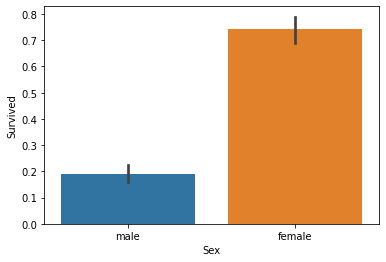

In [106]:
sns.barplot(data=df,x='Sex',y='Survived')

FEMALES ARE MOST LIKELY TO BE SURVIVED COMPARED TO MALE

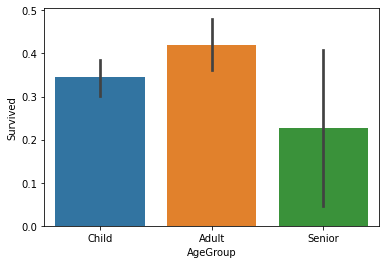

In [107]:
bins = [10,30,60,np.inf]
labels = ['Child','Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

ADULT AND CHILD ARE LIKELY TO BE SURVIVED AS COMPARED TO SENIORS

<AxesSubplot:xlabel='Pclass', ylabel='count'>

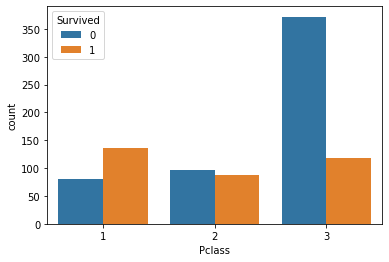

In [114]:
sns.countplot(data=df,x='Pclass',hue='Survived')


<AxesSubplot:xlabel='SibSp', ylabel='count'>

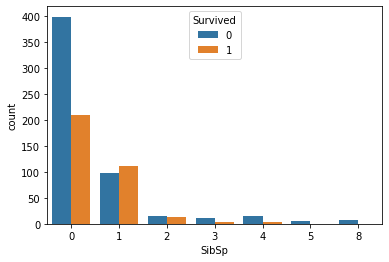

In [116]:


sns.countplot(data=df,x='SibSp',hue='Survived')


<AxesSubplot:xlabel='Parch', ylabel='count'>

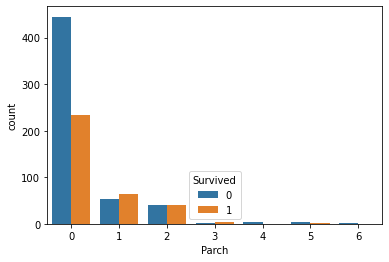

In [117]:
sns.countplot(data=df,x='Parch',hue='Survived')


FROM THE ABOVE GRAPH WE CAN NOTICE THAT 

IN Pclass 3 survival vs not suvived  ratio is 1:2,
Pclass 3 are ay be high class people who got transfered in life boat 

AND IN SibSp 5 and 8 have not survived 

AND IN Parch 4 and 6 have same conditon as SibSp

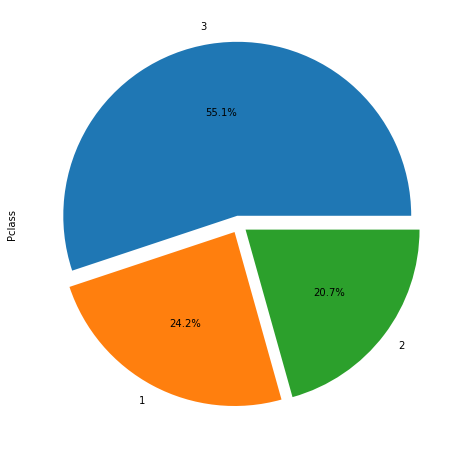

In [112]:
plt.figure(figsize=(10,8))
df.Pclass.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

PCLASS 3 ARE HIGHEST IN NUMBER

In [ ]:
df[df['SibSp']==8]

SibSp =8 , with more cousins /spouse on board are not likely to be survived

AS TICKET IS NOT HAVING ANY ROLE IN PREDICTING SURVIVAL RATE,SO DROPING TICKET and AGE AS NEW AGEGROUP IS ADDED

In [ ]:
df.drop(['Ticket'],inplace=True,axis=1)
df.drop(['Age'],inplace=True,axis=1)
df

In [ ]:
np.unique(df['Pclass'])

In [ ]:
#GROUPING FARE
bins = [0,1,2,3]
labels = ['High','Medium', 'Low']
df['Faregroup'] = pd.cut(df["Pclass"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="Faregroup", y="Survived", data=df)
plt.show()

PREDICTION WAS TRUE, 

HENCE HIGHER THE FARE ,HIGH CHANCE OF SURVIVAL

In [ ]:
df

In [ ]:
df.drop(['Fare'],axis=1,inplace=True)
df

CONVERTING CATEGORIAL DATA INTO INT

In [ ]:
#Now lets assign a labels to our quality variable

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
df['Sex'] = LE.fit_transform(df['Sex'])
df['Faregroup'] = LE.fit_transform(df['Faregroup'])
df['AgeGroup'] = LE.fit_transform(df['AgeGroup'])
df['Embarked'] = LE.fit_transform(df['Embarked'])

In [ ]:
df.value_counts('Sex')


In [ ]:
df.value_counts('Faregroup')


In [ ]:
df.value_counts('AgeGroup')


In [ ]:

df.value_counts('Embarked')

In [ ]:
df

# Checking outliers

In [ ]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15),color = 'green')
plt.tight_layout()

OUTLIERS ARE PRESENT HENCE REMOVING IT WITH ZSCORE

# Applying Z Score 
for removing outiers

In [ ]:
from scipy.stats import zscore

In [ ]:
z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df1=df[(z<3).all(axis=1)]
x=df1
x

In [ ]:
#independent column
x=df1.iloc[:,1:]
#target
y=df1.iloc[:,0]

In [ ]:
x.shape

In [ ]:
y.shape

# Percentage loss

In [ ]:
loss_percent=(891-846)/846*100
print(loss_percent,'%')

In [ ]:
df1.plot(kind='box',subplots=True,layout=(4,2),figsize=(10,15))

outliers are still present,but percentage loss is almost 5%,cannot remove more

# Checking skewness

In [ ]:
df1.skew()

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

SKEWNESS PRESENT HENCE REMOVING IT,

PARCH AND SIBSP HAVING RIGHT SKEWNESS

# Removing skewness

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
df1=power_transform(x,method='yeo-johnson')
df1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x


# Splitting the DataFrame

train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)


In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# Building model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)
print(predlo)


print('Accuracy Score is',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

In [ ]:
#2 MODEL

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predlo=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predlo=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

In [ ]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predlo=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
predlo = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(predlo,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print('Classification Report''\n',classification_report(y_test,predlo))

# cross Validation

for checking the overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(lo,x,y,cv=5)
print('cross validation score of logistic model:',cv.mean())


In [ ]:
cv=cross_val_score(dt,x,y,cv=5)
print('cross validaiton score of decisionTree model :',cv.mean())


In [ ]:
cv=cross_val_score(rfc,x,y,cv=5)
print('cross validaiton score of randomforest model :',cv.mean())


In [ ]:
cv=cross_val_score(svc,x,y,cv=5)
print('cross validaiton score of svc model :',cv.mean())


 randomforest and supportvector classifier are performing better 

as, difference between cv-score and r2 score is least in them


# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

In [ ]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

# Final Prediction Submission


In [ ]:
import numpy as np
a = np.array(y_test)
predicted = np.array(svc.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

# Saving the model in pickle format

In [ ]:
import joblib

loadmodel=joblib.load('Titanic.pkl')